<a href="https://colab.research.google.com/github/Eduard25/Redes/blob/master/Tarea6_2a_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation, Layer, Input
from keras.optimizers import RMSprop, Adam

from matplotlib import pyplot as plt
import numpy as np
import math

In [4]:
loss_tracker = keras.metrics.Mean(name="loss")

In [18]:
class Funsol(Sequential):
    @property
    def metrics(self):
        return [loss_tracker]

    def train_step(self, data):
        batch_size =100
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        f = 3.*tf.math.sin(math.pi*x) #Así tensorflow entiende que se está aplicando un Seno


        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #loss = keras.losses.mean_squared_error(y_pred,eq)
            loss = tf.math.reduce_mean(tf.math.square(y_pred-f))

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}


In [29]:
model = Funsol()

model.add(Dense(500,activation='tanh', input_shape=(1,)))
model.add(Dense(150,activation='tanh'))
model.add(Dense(150,activation='relu'))
model.add(Dense(1))

model.summary()

Model: "funsol_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 500)               1000      
                                                                 
 dense_17 (Dense)            (None, 150)               75150     
                                                                 
 dense_18 (Dense)            (None, 150)               22650     
                                                                 
 dense_19 (Dense)            (None, 1)                 151       
                                                                 
Total params: 98951 (386.53 KB)
Trainable params: 98951 (386.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


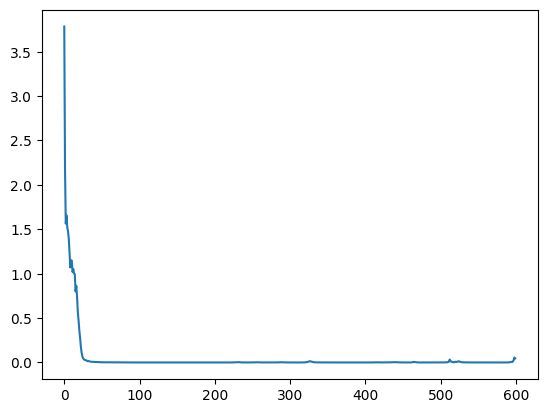

In [30]:
model.compile(optimizer=Adam(), metrics=['loss'])

x=tf.linspace(-1,1,100)

history = model.fit(x,epochs=600,verbose=0)
plt.plot(history.history["loss"])
plt.show()

4/4 [==============================] - 0s 4ms/step


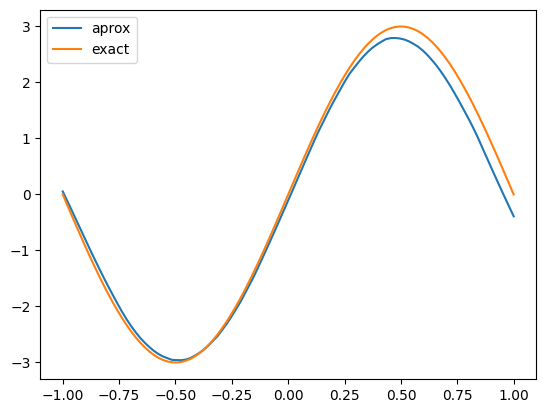

In [31]:
x_testv = tf.linspace(-1,1,100)
a=model.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv,3.*tf.math.sin(math.pi*x),label="exact")
plt.legend()
plt.show()